In [52]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.2.0


## Baseline 107
After all filtering, including removing variants with high missingness.  
Includes sites with more than two alleles.

In [53]:
baseline = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/filtered/BL107_final_filtered_nomis.vcf'

In [ ]:
allel.vcf_to_hdf5(baseline,
                  '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/filtered/BL107_final_filtered_nomis.h5',
                  fields='*',
                  overwrite=True)

## FN 27
After all filtering  
Only biallelic sites

In [54]:
de_novo = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_singhom_isec_collapsed.vcf'

In [ ]:
allel.vcf_to_hdf5(de_novo,
                  '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_singhom_isec_collapsed.h5',
                  fields='*',
                  overwrite=True)

## Indel length distribution

### Baseline

In [56]:
callset = h5py.File('/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/filtered/BL107_final_filtered_nomis.h5', mode='r')


In [57]:
variants = allel.VariantChunkedTable(callset['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'AC'])

In [58]:
lengths = np.vectorize(len)
unique, counts = np.unique(lengths(variants['ALT'][:, 0]) - lengths(variants['REF'][:]), return_counts=True)

In [59]:
non_indel_index = np.where(np.logical_and(unique > -1, unique < 1))[0][0]
non_indel_num = counts[non_indel_index]

In [60]:
counts = counts/(len(variants['REF'][:]) - non_indel_num)

In [61]:
len_range = 20
ins_start = np.where(np.logical_and(unique > 0, unique < len_range+1))[0][0]
ins_end = np.where(np.logical_and(unique > 0, unique < len_range+1))[0][-1]
del_start = np.where(np.logical_and(unique < 0, unique > -1*len_range-1))[0][0]
del_end = np.where(np.logical_and(unique < 0, unique > -1*len_range-1))[0][-1]

### De novo

In [62]:
callset_dn = h5py.File('/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_singhom_isec_collapsed.h5', mode='r')

In [63]:
variants_dn = allel.VariantChunkedTable(callset_dn['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'AC'])

In [64]:
lengths = np.vectorize(len)
unique_dn, counts_dn = np.unique(lengths(variants_dn['ALT'][:, 0]) - lengths(variants_dn['REF'][:]), return_counts=True)

In [65]:
non_indel_index_dn = np.where(np.logical_and(unique_dn > -1, unique_dn < 1))[0][0]
non_indel_num_dn = counts_dn[non_indel_index_dn]

In [66]:
counts_dn = counts_dn/(len(variants_dn['REF'][:]) - non_indel_num_dn)

In [67]:
len_range_dn = 20
ins_start_dn = np.where(np.logical_and(unique_dn > 0, unique_dn < len_range_dn+1))[0][0]
ins_end_dn = np.where(np.logical_and(unique_dn > 0, unique_dn < len_range_dn+1))[0][-1]
del_start_dn = np.where(np.logical_and(unique_dn < 0, unique_dn > -1*len_range_dn-1))[0][0]
del_end_dn = np.where(np.logical_and(unique_dn < 0, unique_dn > -1*len_range_dn-1))[0][-1]

### Plot

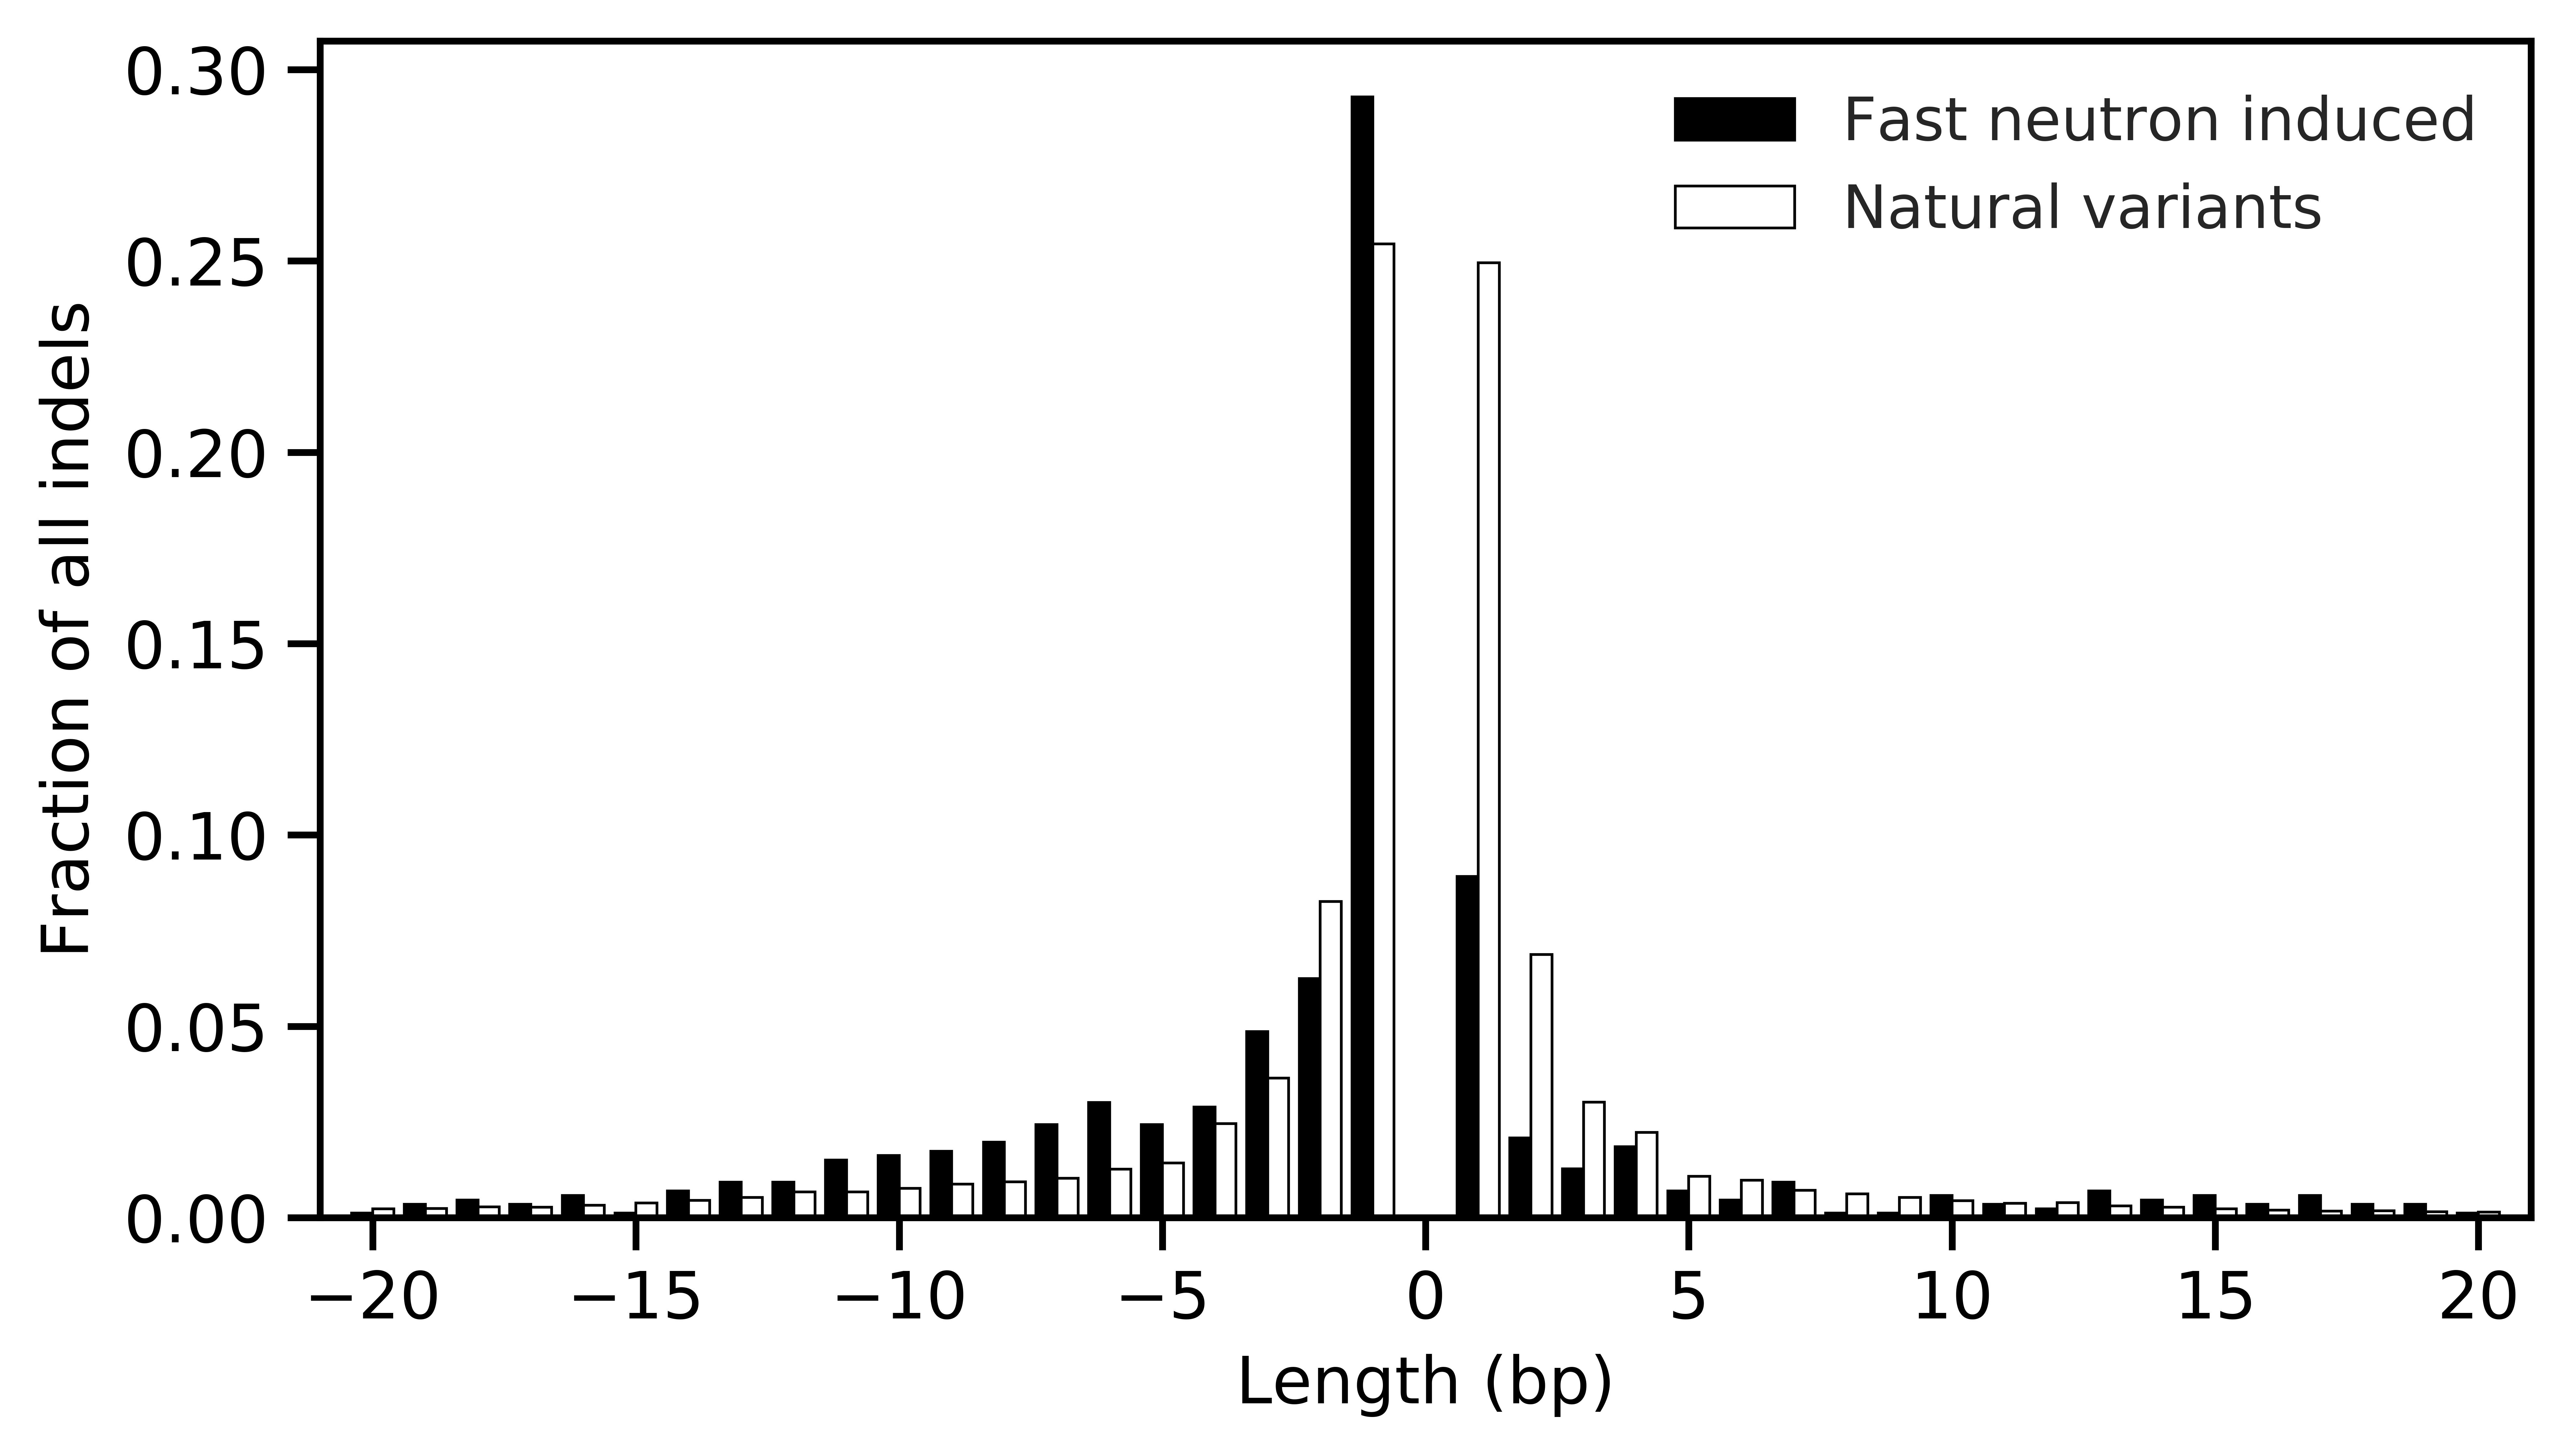

In [68]:
fig, ax = plt.subplots(figsize=(6.75, 4), dpi=1200, facecolor='w', edgecolor='black')
plt.bar(unique_dn[ins_start_dn:ins_end_dn+1]-0.2, counts_dn[ins_start_dn:ins_end_dn+1], width=0.4, color='black', edgecolor='black', linewidth='0.5', label='Fast neutron induced')
plt.bar(unique_dn[del_start_dn:del_end_dn+1]-0.2, counts_dn[del_start_dn:del_end_dn+1], width=0.4, color='black', edgecolor='black', linewidth='0.5')
plt.bar(unique[ins_start:ins_end+1]+0.2, counts[ins_start:ins_end+1], width=0.4, color='white', edgecolor='black', linewidth='0.5', label='Natural variants')
plt.bar(unique[del_start:del_end+1]+0.2, counts[del_start:del_end+1], width=0.4, color='white', edgecolor='black', linewidth='0.5')
ax.set_xlim(-1*len_range-1, len_range+1)
ax.set_ylabel('Fraction of all indels');
ax.set_xlabel('Length (bp)');
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
plt.legend(frameon=False)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.2)
#plt.savefig('test.pdf')

## Insertion and deletion compositions

In [69]:
baseline_SND = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/filtered/BL107_final_filtered_nomis_bia_SNDs.vcf'

In [70]:
baseline_SNI = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/filtered/BL107_final_filtered_nomis_bia_SNIs.vcf'

In [71]:
de_novo_SND = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_singhom_isec_collapsed_SND.vcf'

In [72]:
de_novo_SNI = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_singhom_isec_collapsed_SNI.vcf'

In [81]:
allel.vcf_to_hdf5(baseline_SND,
                  '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/filtered/BL107_final_filtered_nomis_bia_SNDs2.h5',
                  fields='*',
                  overwrite=True)

In [ ]:
allel.vcf_to_hdf5(baseline_SNI,
                  '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/filtered/BL107_final_filtered_nomis_bia_SNIs.h5',
                  fields='*',
                  overwrite=True)

In [ ]:
allel.vcf_to_hdf5(de_novo_SND,
                  '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_singhom_isec_collapsed_SND.h5',
                  fields='*',
                  overwrite=True)

In [ ]:
allel.vcf_to_hdf5(de_novo_SNI,
                  '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_singhom_isec_collapsed_SNI.h5',
                  fields='*',
                  overwrite=True)

In [82]:
callset_bl_snd = h5py.File('/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/filtered/BL107_final_filtered_nomis_bia_SNDs2.h5', mode='r')
callset_bl_sni = h5py.File('/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/filtered/BL107_final_filtered_nomis_bia_SNIs.h5', mode='r')
callset_dn_snd = h5py.File('/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_singhom_isec_collapsed_SND.h5', mode='r')
callset_dn_sni = h5py.File('/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_singhom_isec_collapsed_SNI.h5', mode='r')

In [83]:
variants_bl_snd = allel.VariantChunkedTable(callset_bl_snd['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'AC'])
variants_bl_sni = allel.VariantChunkedTable(callset_bl_sni['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'AC'])
variants_dn_snd = allel.VariantChunkedTable(callset_dn_snd['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'AC'])
variants_dn_sni = allel.VariantChunkedTable(callset_dn_sni['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'AC'])

In [86]:
variants = variants_bl_snd
filter_A = '(REF == "GA") | (REF == "TA") | (REF == "CA") | (REF == "AA")'
selection_A = variants.eval(filter_A)[:]
variants_A = variants.compress(selection_A)
filter_T = '(REF == "GT") | (REF == "TT") | (REF == "CT") | (REF == "AT")'
selection_T = variants.eval(filter_T)[:]
variants_T = variants.compress(selection_T)
filter_G = '(REF == "GG") | (REF == "TG") | (REF == "CG") | (REF == "AG")'
selection_G = variants.eval(filter_G)[:]
variants_G = variants.compress(selection_G)
filter_C = '(REF == "GC") | (REF == "TC") | (REF == "CC") | (REF == "AC")'
selection_C = variants.eval(filter_C)[:]
variants_C = variants.compress(selection_C)
counts = np.array([len(variants_A), len(variants_T), len(variants_G), len(variants_C)])
counts_bl_snd = counts/len(variants)

In [87]:
variants = variants_dn_snd
filter_A = '(REF == "GA") | (REF == "TA") | (REF == "CA") | (REF == "AA")'
selection_A = variants.eval(filter_A)[:]
variants_A = variants.compress(selection_A)
filter_T = '(REF == "GT") | (REF == "TT") | (REF == "CT") | (REF == "AT")'
selection_T = variants.eval(filter_T)[:]
variants_T = variants.compress(selection_T)
filter_G = '(REF == "GG") | (REF == "TG") | (REF == "CG") | (REF == "AG")'
selection_G = variants.eval(filter_G)[:]
variants_G = variants.compress(selection_G)
filter_C = '(REF == "GC") | (REF == "TC") | (REF == "CC") | (REF == "AC")'
selection_C = variants.eval(filter_C)[:]
variants_C = variants.compress(selection_C)
counts = np.array([len(variants_A), len(variants_T), len(variants_G), len(variants_C)])
counts_dn_snd = counts/len(variants)

In [88]:
nucleotides = np.array([1.0, 2.0, 3.0, 4.0])

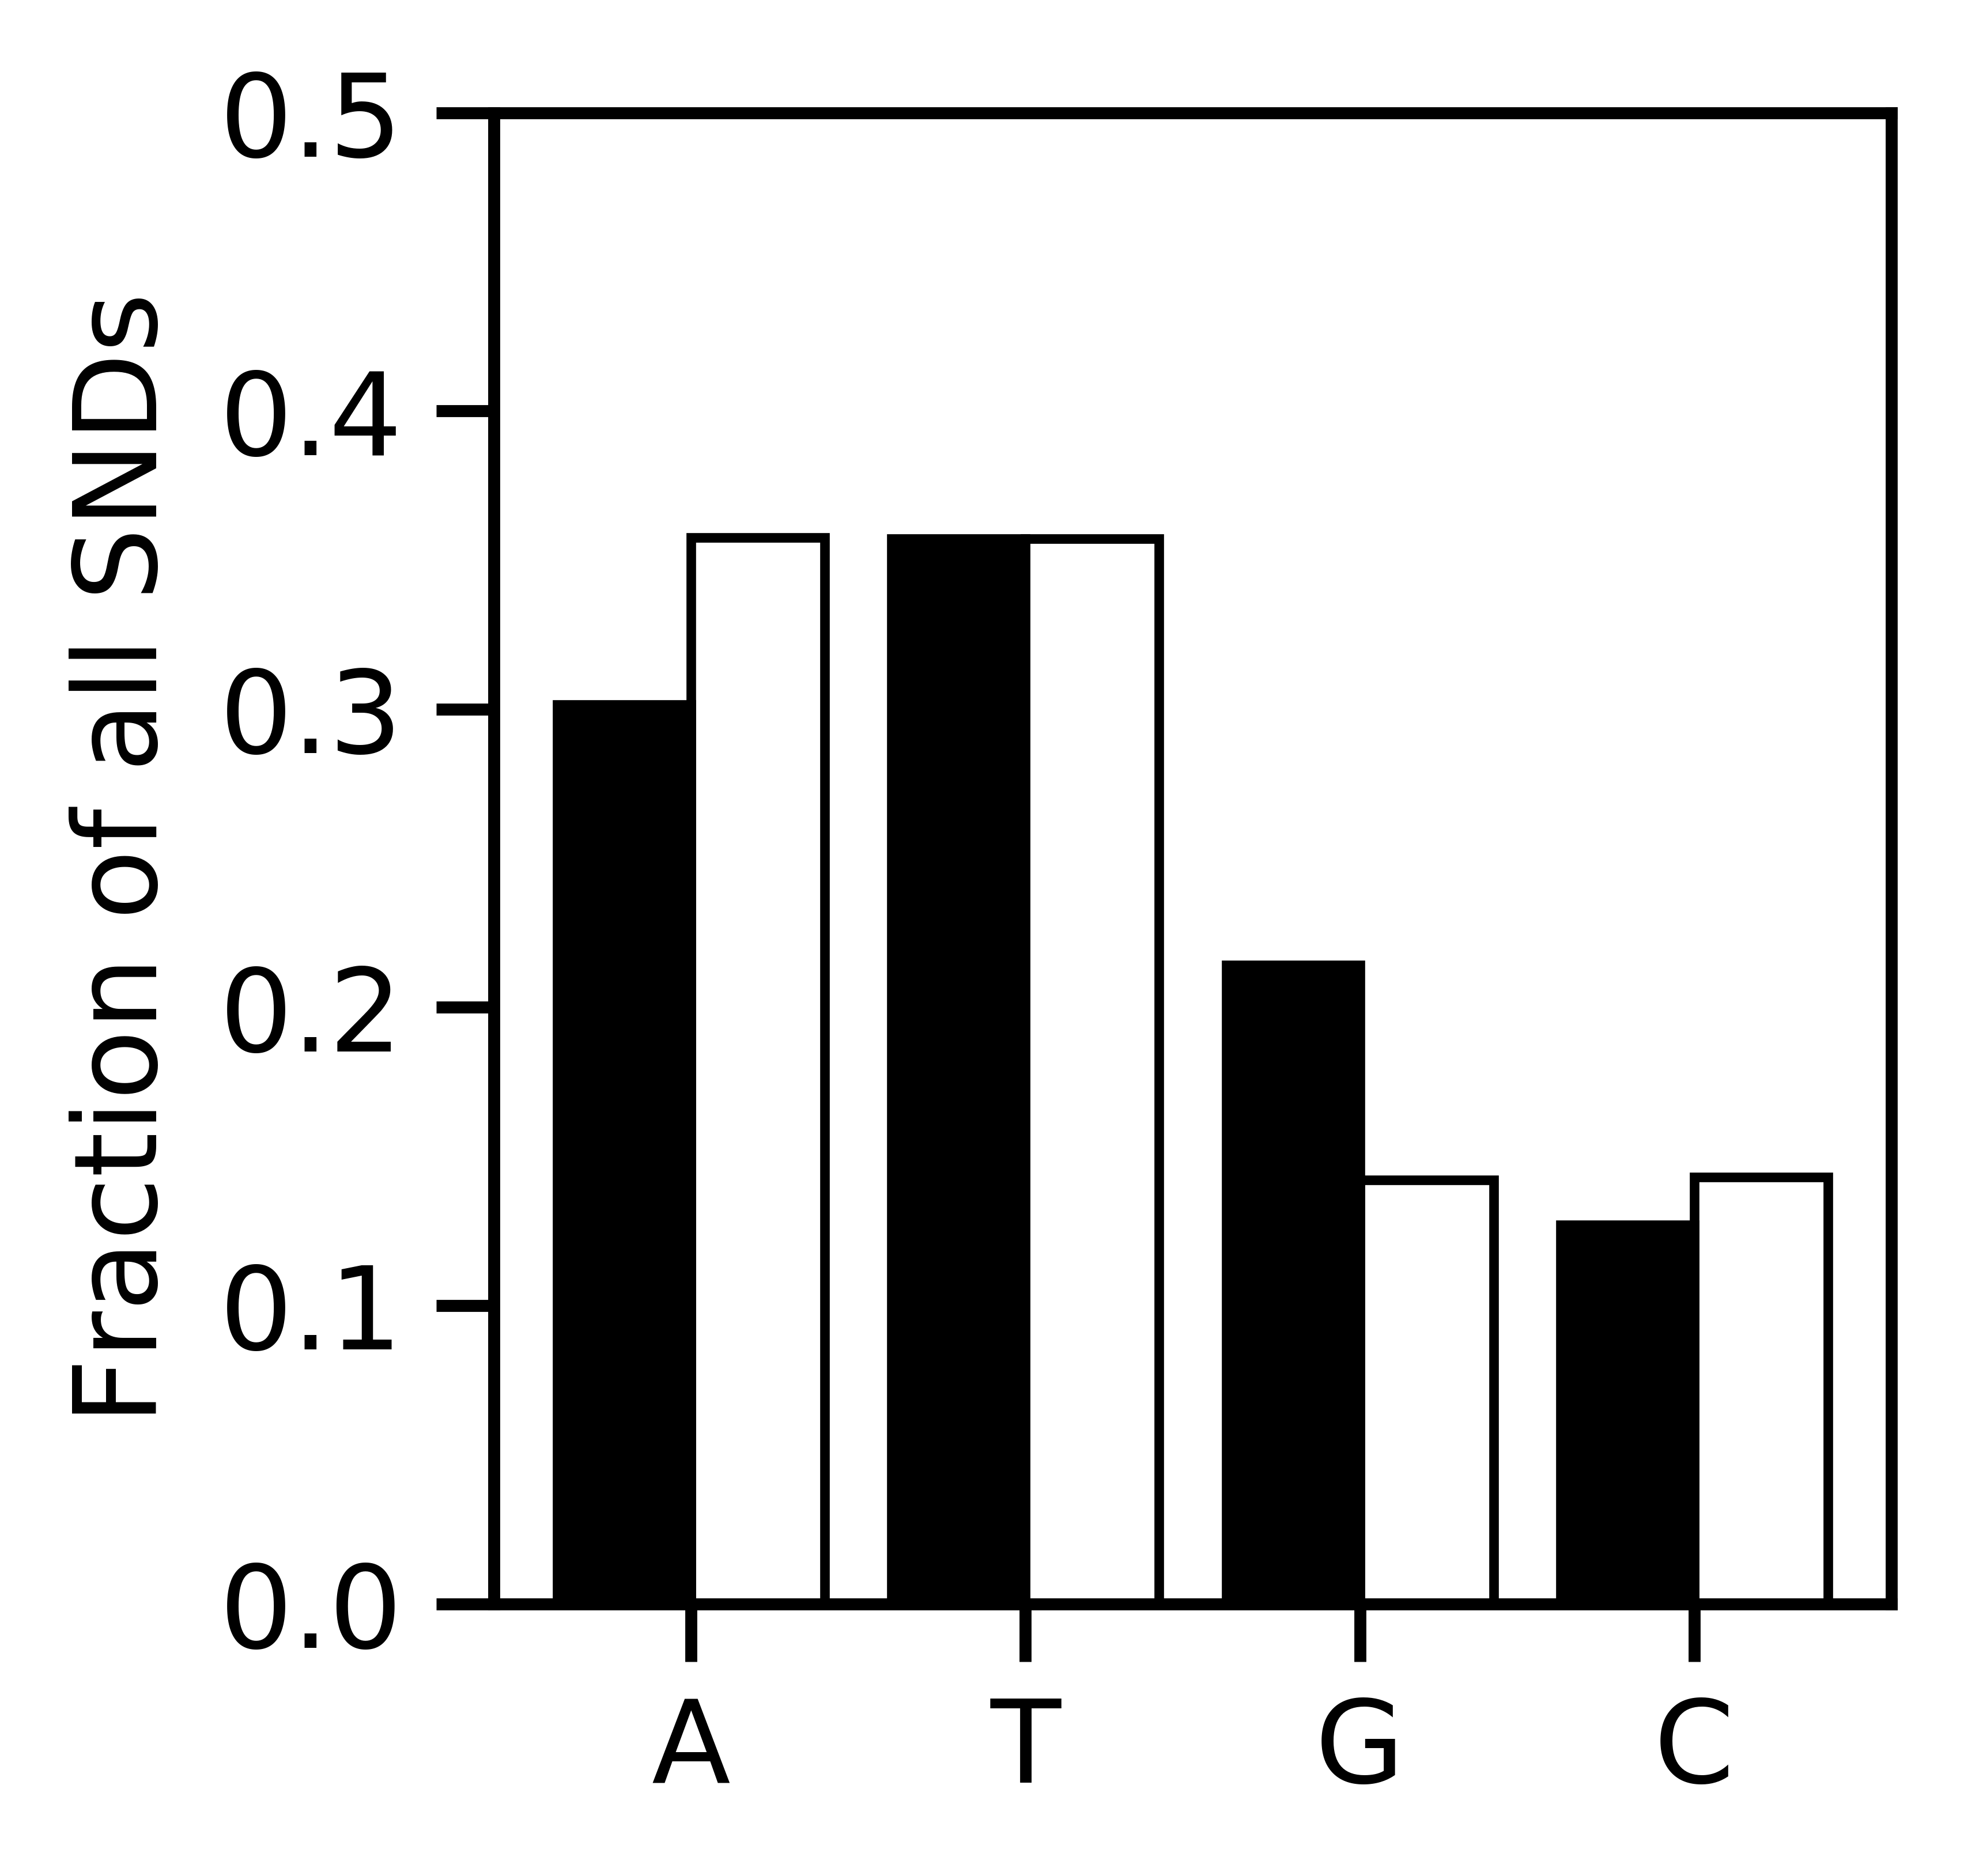

In [90]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=1200, facecolor='w', edgecolor='black')
plt.bar(nucleotides+0.2, counts_bl_snd, width=0.4, color='white', edgecolor='black', linewidth='1')
plt.bar(nucleotides-0.2, counts_dn_snd, width=0.4, color='black', edgecolor='black', linewidth='1')
ax.set_ylabel('Fraction of all SNDs');
#ax.set_xlabel('Nucleotide');
ax.set_ylim(0,0.5)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
plt.xticks(nucleotides, ('A', 'T', 'G', 'C'))
#plt.legend(frameon=False)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.2)
#plt.savefig('test.pdf')

In [91]:
ra = allel.vcf_to_recarray(baseline_SNI)
variants = allel.VariantTable(ra)
filter_A = '(ALT_1 == "GA") | (ALT_1 == "TA") | (ALT_1 == "CA") | (ALT_1 == "AA")'
selection_A = variants.eval(filter_A)[:]
variants_A = variants.compress(selection_A)
filter_T = '(ALT_1 == "GT") | (ALT_1 == "TT") | (ALT_1 == "CT") | (ALT_1 == "AT")'
selection_T = variants.eval(filter_T)[:]
variants_T = variants.compress(selection_T)
filter_G = '(ALT_1 == "GG") | (ALT_1 == "TG") | (ALT_1 == "CG") | (ALT_1 == "AG")'
selection_G = variants.eval(filter_G)[:]
variants_G = variants.compress(selection_G)
filter_C = '(ALT_1 == "GC") | (ALT_1 == "TC") | (ALT_1 == "CC") | (ALT_1 == "AC")'
selection_C = variants.eval(filter_C)[:]
variants_C = variants.compress(selection_C)
counts = np.array([len(variants_A), len(variants_T), len(variants_G), len(variants_C)])
counts_bl_sni = counts/len(variants)

In [92]:
ra = allel.vcf_to_recarray(de_novo_SNI)
variants = allel.VariantTable(ra)
filter_A = '(ALT_1 == "GA") | (ALT_1 == "TA") | (ALT_1 == "CA") | (ALT_1 == "AA")'
selection_A = variants.eval(filter_A)[:]
variants_A = variants.compress(selection_A)
filter_T = '(ALT_1 == "GT") | (ALT_1 == "TT") | (ALT_1 == "CT") | (ALT_1 == "AT")'
selection_T = variants.eval(filter_T)[:]
variants_T = variants.compress(selection_T)
filter_G = '(ALT_1 == "GG") | (ALT_1 == "TG") | (ALT_1 == "CG") | (ALT_1 == "AG")'
selection_G = variants.eval(filter_G)[:]
variants_G = variants.compress(selection_G)
filter_C = '(ALT_1 == "GC") | (ALT_1 == "TC") | (ALT_1 == "CC") | (ALT_1 == "AC")'
selection_C = variants.eval(filter_C)[:]
variants_C = variants.compress(selection_C)
counts = np.array([len(variants_A), len(variants_T), len(variants_G), len(variants_C)])
counts_dn_sni = counts/len(variants)

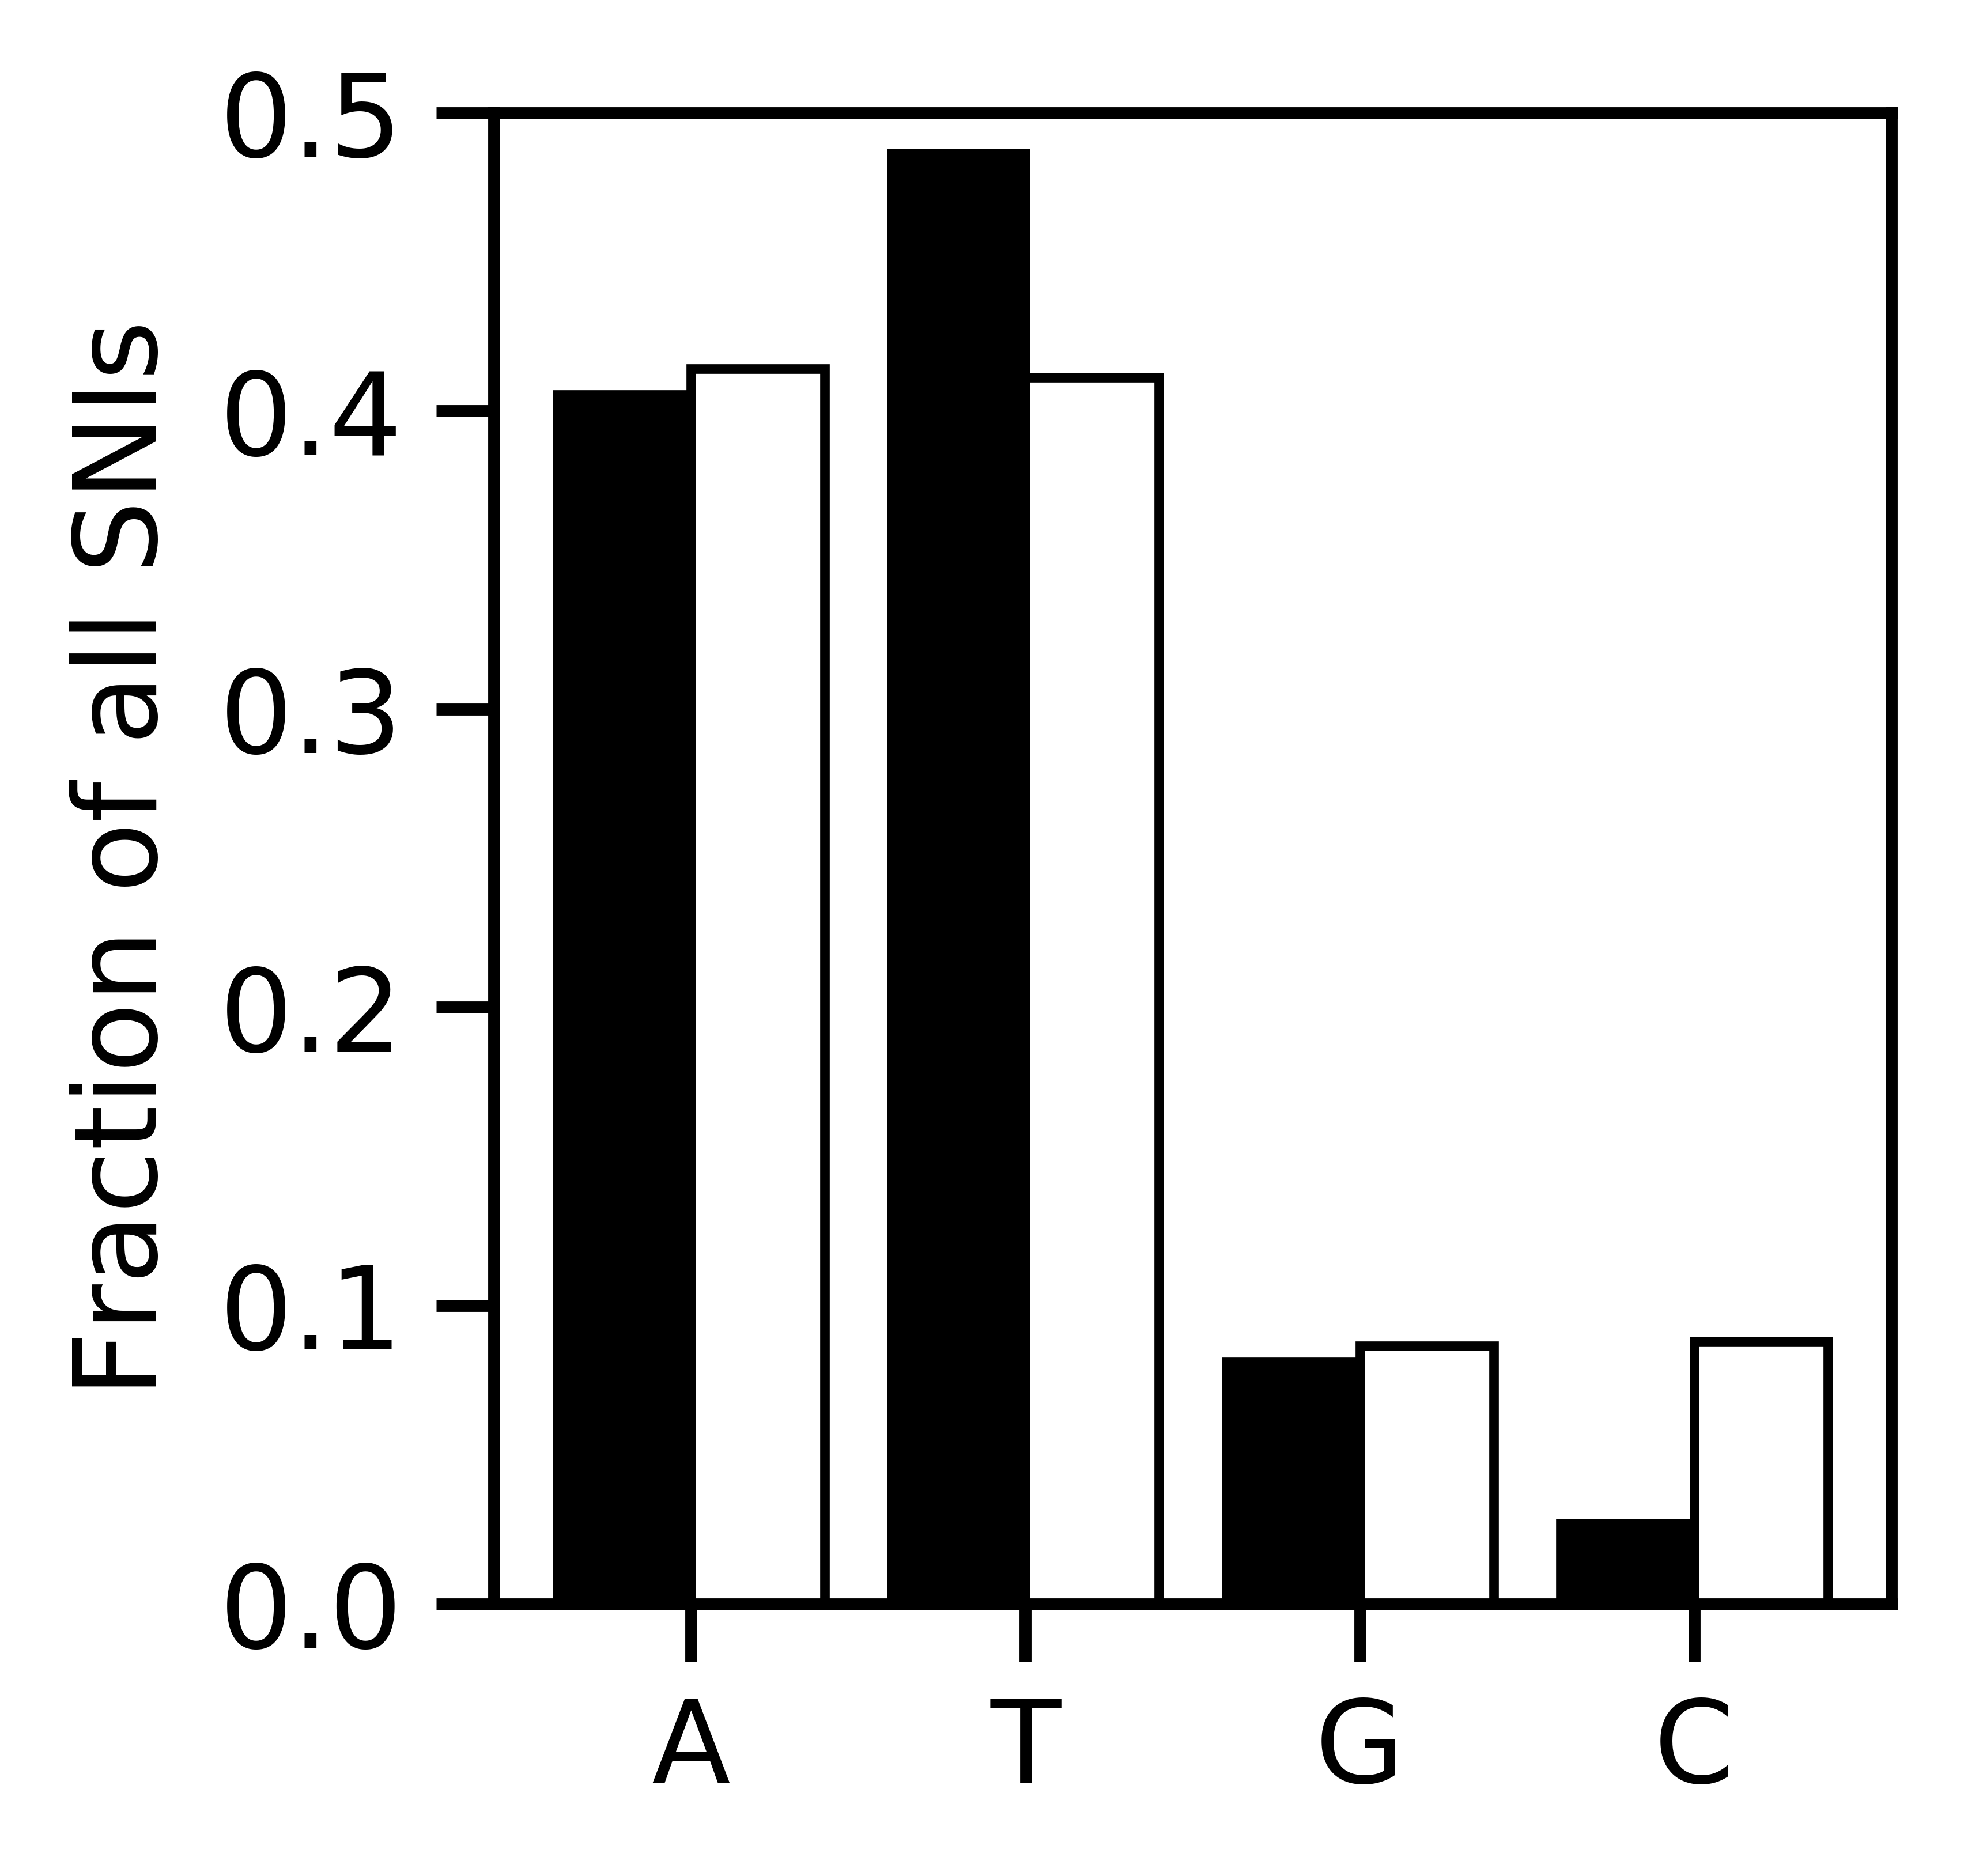

In [93]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=1200, facecolor='w', edgecolor='black')
plt.bar(nucleotides+0.2, counts_bl_sni, width=0.4, color='white', edgecolor='black', linewidth='1')
plt.bar(nucleotides-0.2, counts_dn_sni, width=0.4, color='black', edgecolor='black', linewidth='1')
ax.set_ylabel('Fraction of all SNIs');
#ax.set_xlabel('Nucleotide');
ax.set_ylim(0,0.5)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
plt.xticks(nucleotides, ('A', 'T', 'G', 'C'))
#plt.legend(frameon=False)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.2)
#plt.savefig('test.pdf')

## Mutation frequency spectrum
From bcftools stats

In [94]:
labels = ["A>C", "A>G", "A>T", "C>A", "C>G", "C>T", "G>A", "G>C", "G>T", "T>A", "T>C", "T>G"]
label_nums = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
dn_asym = [57, 114, 80, 77, 39, 319, 336, 31, 82, 98, 135, 62]
bl_asym = [342243, 1213249, 544888, 511105, 267083, 2016587, 2018904, 265592, 513823, 546312, 1213807, 342763]

In [95]:
bl_asym_norm = bl_asym/np.sum(bl_asym)
dn_asym_norm = dn_asym/np.sum(dn_asym)

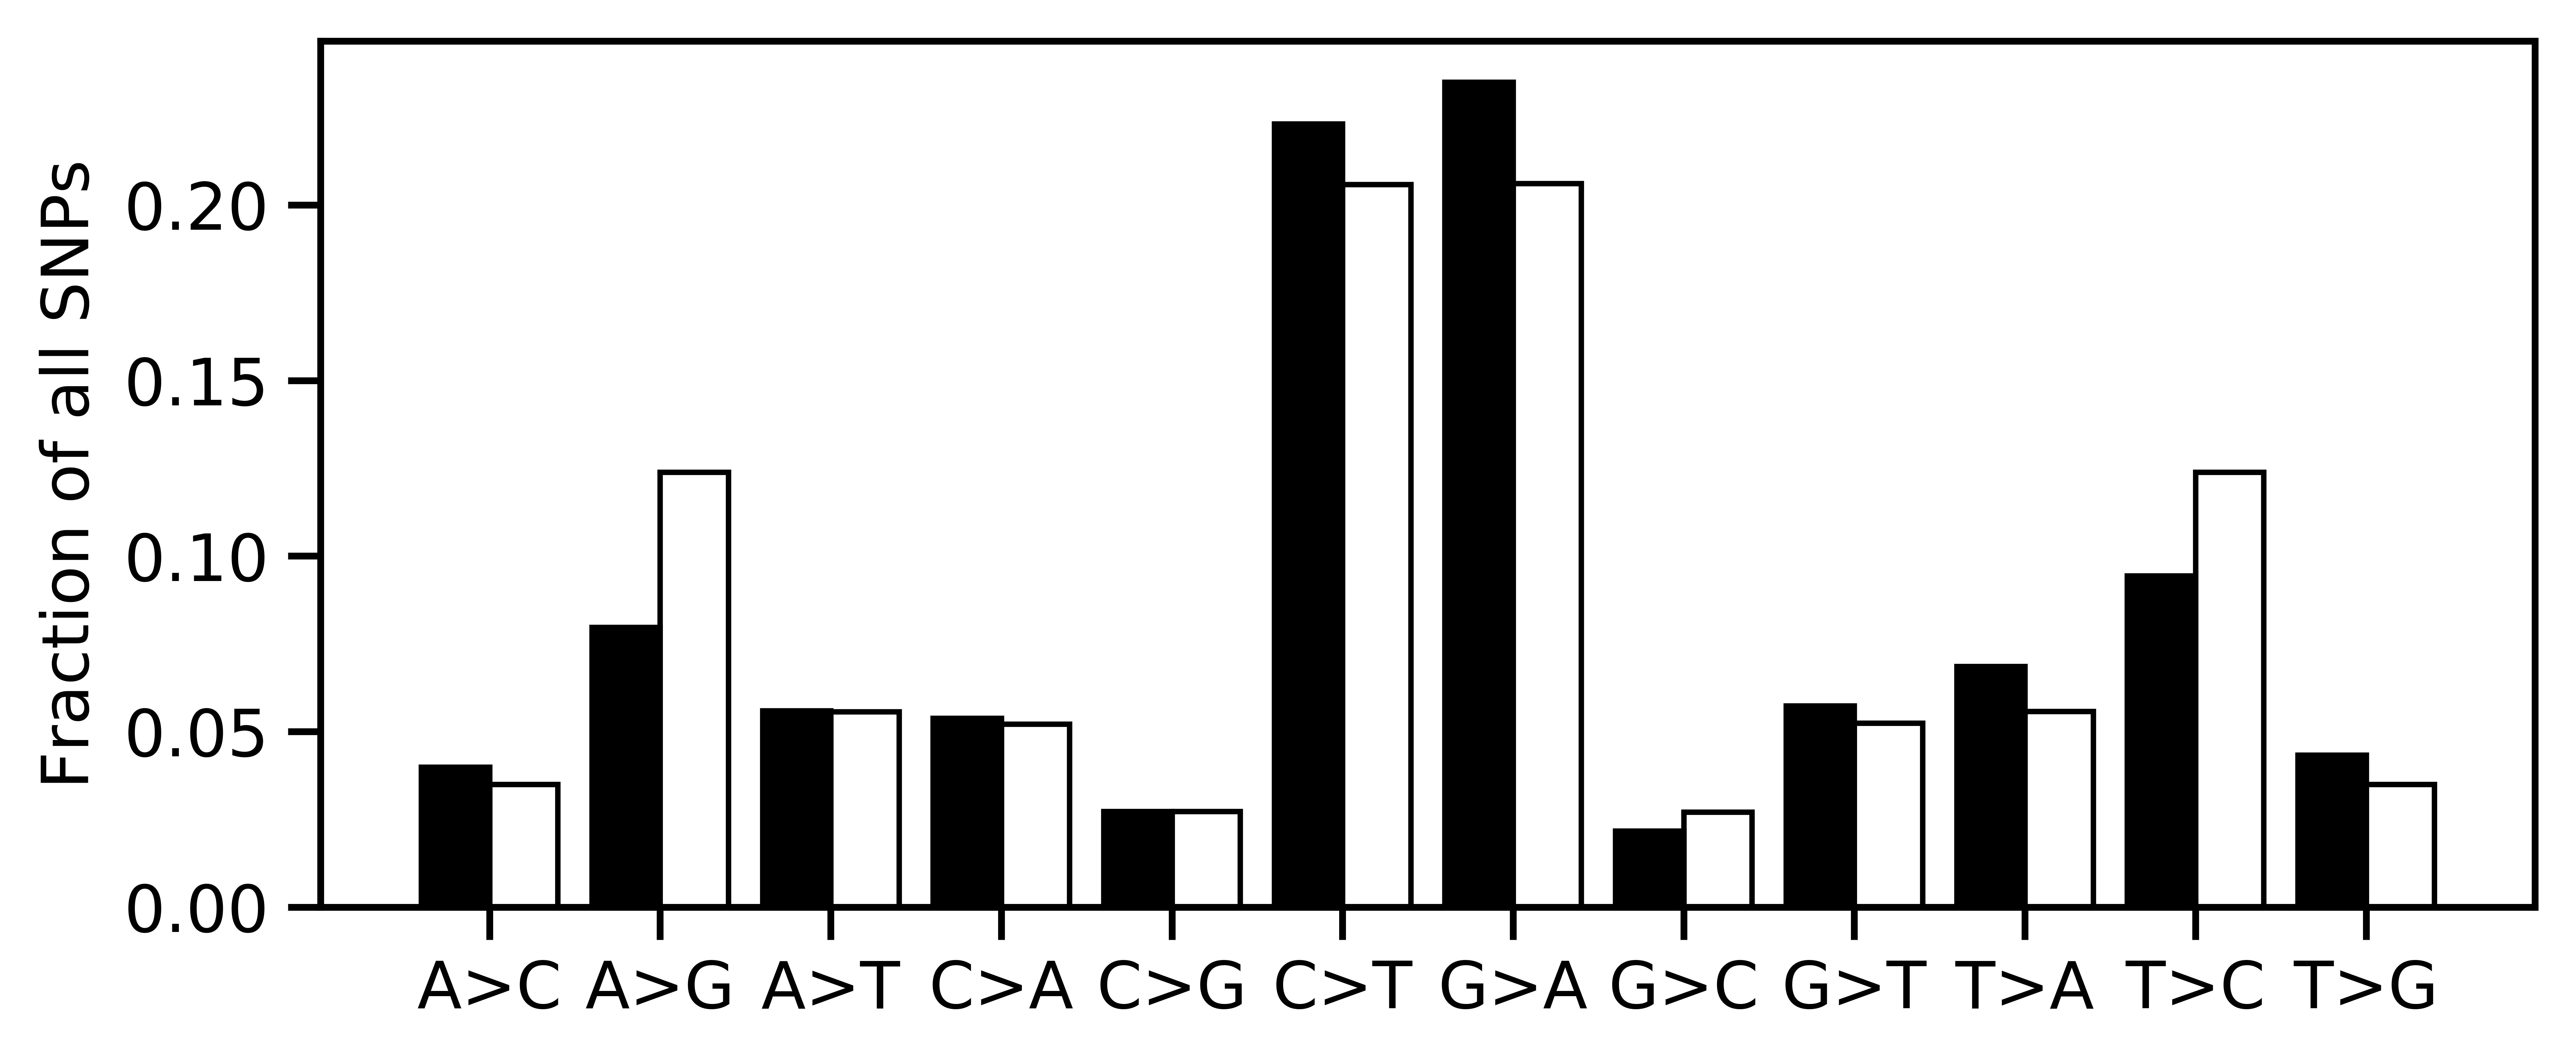

In [96]:
fig, ax = plt.subplots(figsize=(6.75, 3), dpi=1200, facecolor='w', edgecolor='black')
plt.bar(label_nums+0.2, bl_asym_norm, width=0.4, color='white', edgecolor='black', linewidth='1')
plt.bar(label_nums-0.2, dn_asym_norm, width=0.4, color='black', edgecolor='black', linewidth='1')
ax.set_ylabel('Fraction of all SNPs');
#ax.set_xlabel('Nucleotide');
#ax.set_ylim(0,0.5)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
plt.xticks(label_nums, labels)
#plt.legend(frameon=False)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.2)
#plt.savefig('test.pdf')

In [97]:
labels_sym = ["AT>CG", "AT>TA", "CG>AT", "CG>GC", "AT>GC", "CG>TA"]
label_nums_sym = np.array([1, 2, 3, 4, 5, 6])
dn_sym = [57+62, 80+98, 77+82, 39+31, 114+135, 319+336]
bl_sym = [342243+342763, 544888+546312, 511105+513823, 267083+265592, 1213249+1213807, 2016587+2018904]

In [98]:
bl_sym_norm = bl_sym/np.sum(bl_sym)
dn_sym_norm = dn_sym/np.sum(dn_sym)

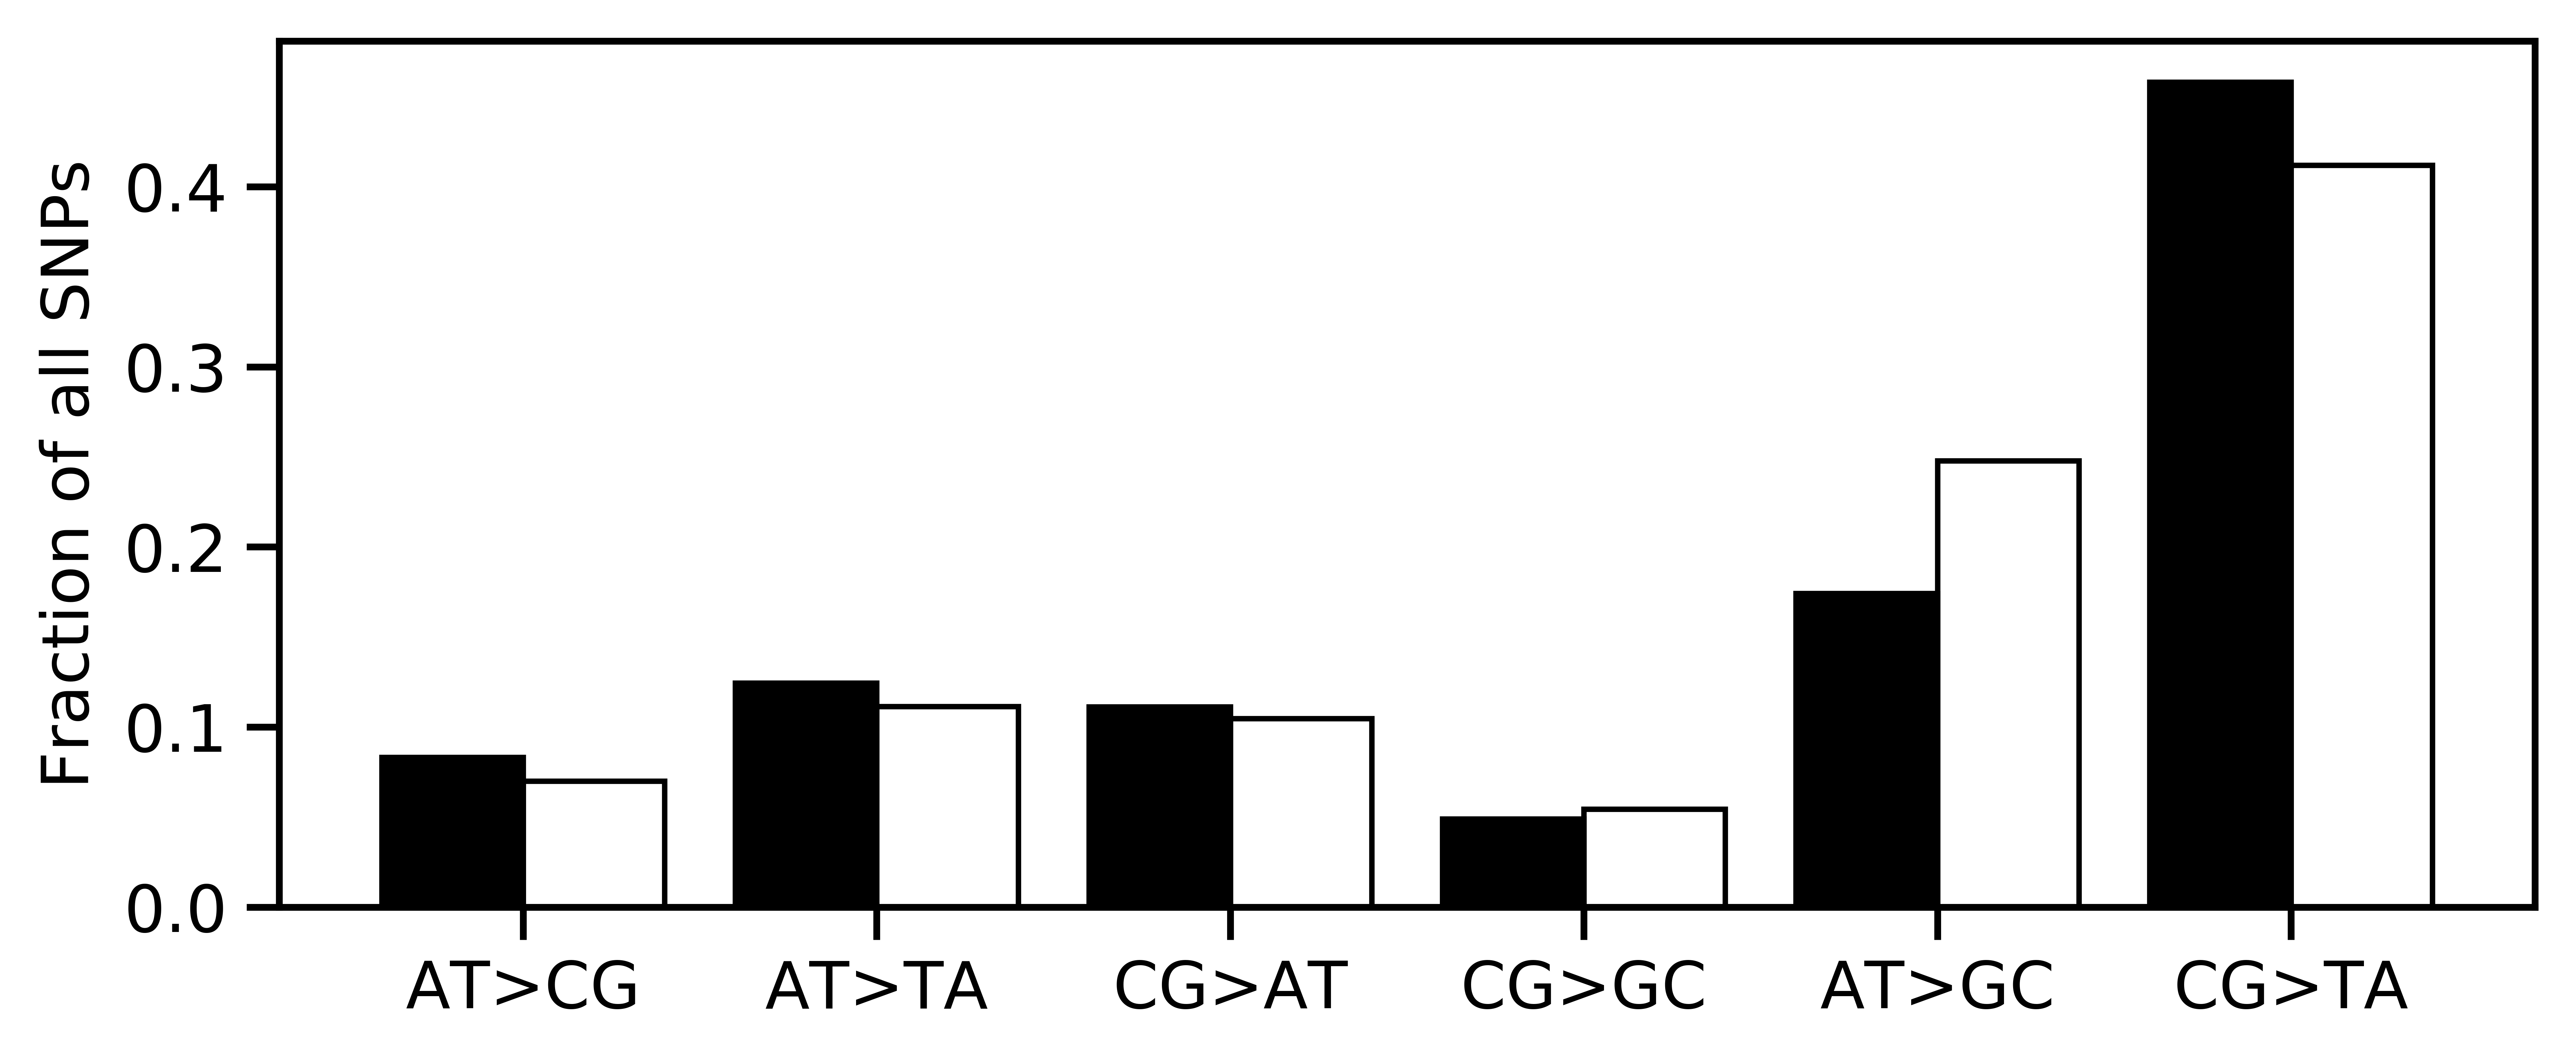

In [99]:
fig, ax = plt.subplots(figsize=(6.75, 3), dpi=1200, facecolor='w', edgecolor='black')
plt.bar(label_nums_sym+0.2, bl_sym_norm, width=0.4, color='white', edgecolor='black', linewidth='1')
plt.bar(label_nums_sym-0.2, dn_sym_norm, width=0.4, color='black', edgecolor='black', linewidth='1')
ax.set_ylabel('Fraction of all SNPs');
#ax.set_xlabel('Nucleotide');
#ax.set_ylim(0,0.5)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
plt.xticks(label_nums_sym, labels_sym)
#plt.legend(frameon=False)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.2)
#plt.savefig('test.pdf')